In [32]:
import sys, os, copy, re, random
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as tck
from matplotlib.lines import Line2D
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1)
sns.set_style("whitegrid")
#palette = list(mcolors.TABLEAU_COLORS.keys())
#palette.extend(['salmon', 'teal','yellowgreen'])
sns.set_theme(style="ticks", palette="muted")
sns.set_context("talk")
palette = sns.color_palette(as_cmap=True)

In [33]:
# Read data:
df = list(pd.read_excel('elution_plotting_data.xlsx', sheet_name=None).values())[0]
df

,Replicate,Method,Type,Nuc_type,Percent
0,1,TapeStation,Loading,tRNA,133.494559
1,2,TapeStation,Loading,tRNA,95.380895
2,3,TapeStation,Loading,tRNA,82.515115
3,4,TapeStation,Loading,tRNA,88.609432
4,1,TapeStation,Eluted,tRNA,72.648126
5,2,TapeStation,Eluted,tRNA,48.270859
6,3,TapeStation,Eluted,tRNA,39.177751
7,4,TapeStation,Eluted,tRNA,31.438936
8,1,Spectroscopy,Loading,tRNA,93.814433
9,2,Spectroscopy,Loading,tRNA,92.096220


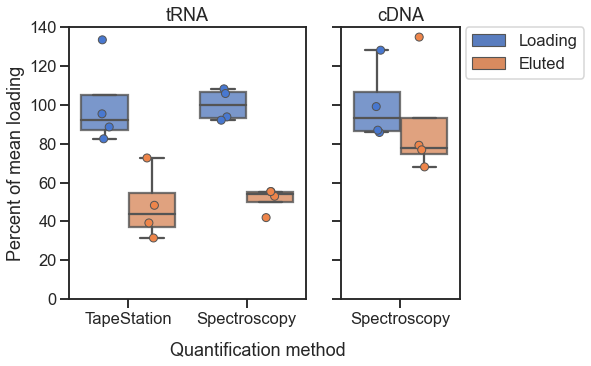

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 5), sharey=True, gridspec_kw={'width_ratios': [2, 1]})
tRNA_mask = df['Nuc_type'] == 'tRNA'
g1 = sns.boxplot(ax=ax1, data=df[tRNA_mask], x='Method', y='Percent', hue='Type', zorder=20, fliersize=0, boxprops=dict(alpha=.8))
g2 = sns.stripplot(ax=ax1, data=df[tRNA_mask], x='Method', y='Percent', hue='Type', dodge=True, zorder=30, size=8, edgecolor='gray', linewidth=1)
ax1.set_title('tRNA');
ax1.set(ylim=(0, 140))
ax1.set_xlabel('')
ax1.set_ylabel('Percent of mean loading');
ax1.get_legend().remove()


cDNA_mask = df['Nuc_type'] == 'cDNA'
g3 = sns.boxplot(ax=ax2, data=df[cDNA_mask], x='Method', y='Percent', hue='Type', zorder=20, fliersize=0, boxprops=dict(alpha=.8))
g4 = sns.stripplot(ax=ax2, data=df[cDNA_mask], x='Method', y='Percent', hue='Type', dodge=True, zorder=30, size=8, edgecolor='gray', linewidth=1)
ax2.set_title('cDNA');
ax2.get_legend().remove()
ax2.set_ylabel('')
ax2.set_xlabel('')


# Legend:
handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.text(0.5, -0.03, 'Quantification method', ha='center')
fig.savefig('gel_elution_tRNA.pdf', bbox_inches='tight');